## Manuel Time Series

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:

filepath = "/content/drive/MyDrive/crime_data/Crimes_2022.csv"
macro_data = pd.read_csv(filepath, parse_dates=['Date'])
print(macro_data.shape)
macro_data.head()

(238555, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12789052,JF350580,2022-08-09 16:07:00,014XX W ELMDALE AVE,0325,ROBBERY,VEHICULAR HIJACKING,STREET,True,False,...,48.0,77,03,1165640.0,1939961.0,2022,01/03/2023 03:46:28 PM,41.990846,-87.666096,"(41.990846423, -87.666096144)"
1,12790581,JF352712,2022-08-10 16:00:00,062XX S ARTESIAN AVE,0810,THEFT,OVER $500,STREET,False,False,...,16.0,66,06,1161110.0,1863210.0,2022,01/03/2023 03:46:28 PM,41.780331,-87.684892,"(41.780330681, -87.684891779)"
2,12790652,JF352659,2022-08-11 10:00:00,094XX S STATE ST,0810,THEFT,OVER $500,STREET,False,True,...,9.0,49,06,1177962.0,1842197.0,2022,01/03/2023 03:46:28 PM,41.722303,-87.623745,"(41.722303228, -87.623745129)"
3,12796135,JF359082,2022-08-15 21:14:00,048XX S KARLOV AVE,0560,ASSAULT,SIMPLE,RESIDENCE,False,False,...,14.0,57,08A,1149844.0,1872244.0,2022,01/03/2023 03:46:28 PM,41.805347,-87.725961,"(41.805347066, -87.725961264)"
4,12795972,JF359058,2022-08-16 16:10:00,015XX S HALSTED ST,0820,THEFT,$500 AND UNDER,SIDEWALK,False,False,...,11.0,28,06,1171290.0,1892413.0,2022,01/03/2023 03:46:28 PM,41.860250,-87.646715,"(41.860249838, -87.64671467)"


In [ ]:

macro_data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
macro_data = macro_data.dropna()

In [ ]:
macro_data = macro_data.drop(['ID', 'Case Number', 'FBI Code', 'Block', 'IUCR', 'Updated On', 'Location', "Year",'Description', 'Location Description','Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'], axis=1)
macro_data['Date'] = pd.to_datetime(macro_data['Date'])

In [ ]:
#macro_data = macro_data.replace({True: 1, False: 0})


In [ ]:
macro_data

,Date,Primary Type
0,2022-08-09 16:07:00,ROBBERY
1,2022-08-10 16:00:00,THEFT
2,2022-08-11 10:00:00,THEFT
3,2022-08-15 21:14:00,ASSAULT
4,2022-08-16 16:10:00,THEFT
...,...,...
238549,2022-12-23 08:41:00,THEFT
238551,2022-12-22 18:00:00,CRIMINAL DAMAGE
238552,2022-12-19 14:00:00,BURGLARY
238553,2022-12-20 06:45:00,THEFT


In [ ]:
from scipy.stats import mode

def get_mode(x):
    return mode(x)[0][0]

In [ ]:
aggregations = {'Primary Type': "count"}   #bunu koy

grouped = macro_data.groupby('Date').agg(aggregations)

In [ ]:
#, 'Arrest': 'mean', 'Domestic': 'mean', 'Beat':  get_mode, 'District':  get_mode,'Ward': get_mode, 'Community Area': get_mode, 'X Coordinate': 'mean', 'Y Coordinate': 'mean', 'Latitude': 'mean','Longitude': 'mean'}

# Group by 'Date' column and apply aggregations

## BURADAN SONRASINA BAK

In [ ]:
grouped #BU ASIL DATA bunu koy, tek değişkenli zaman serisi, suç yoğpunlupu  üzerine

,Primary Type
Date,
2022-01-01 00:00:00,91
2022-01-01 00:01:00,35
2022-01-01 00:03:00,1
2022-01-01 00:04:00,1
2022-01-01 00:05:00,3
...,...
2022-12-31 23:42:00,1
2022-12-31 23:44:00,1
2022-12-31 23:45:00,4


In [ ]:
import pandas as pd
import shutil

# "grouped" verisini CSV dosyasına dönüştürmek ve kaydetmek için
grouped.to_csv("grouped_data1.csv")

# CSV dosyasını hedef konuma kopyala
shutil.copy("grouped_data1.csv", "/content/drive/MyDrive/crime_data/grouped_data1.csv")


'/content/drive/MyDrive/crime_data/grouped_data1.csv'

In [ ]:
110612/12 # HER AY 9217 ORTALAMA SUC ISLENIYO

9217.666666666666

In [ ]:
9200/30 #HER GUN 300 SUC ISLENMIS

306.6666666666667

In [ ]:
data_1000 = grouped['Primary Type'].groupby(pd.Grouper(freq='M')).head(1000)  # 1000 tanesi en iyi temsil ettiği için görselleştirmelerimi daha anlaşılır olsun diye böyle yaptım


In [ ]:
data_1000=pd.DataFrame(data_1000)

<Axes: xlabel='Date', ylabel='Primary Type'>

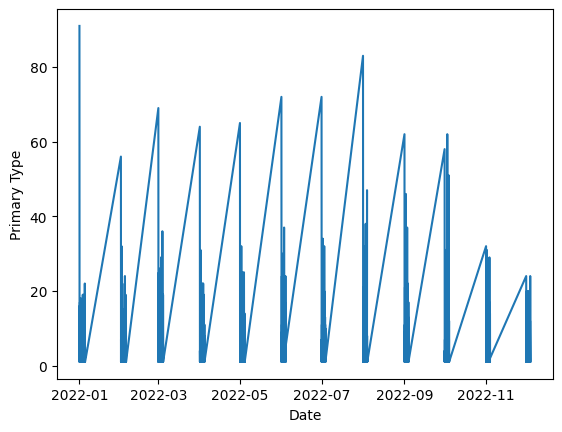

In [ ]:
import seaborn as sns
sns.lineplot(data= data_1000 , x= data_1000.index , y=data_1000["Primary Type"])

In [ ]:
#according to video, stationary testi, rolling mean,standart sapmayı göstermece
data_1000["RollMean"]=data_1000["Primary Type"].rolling(window=12).mean()
data_1000["RollStd"]=data_1000["Primary Type"].rolling(window=12).std()

<Axes: xlabel='Date', ylabel='Primary Type'>

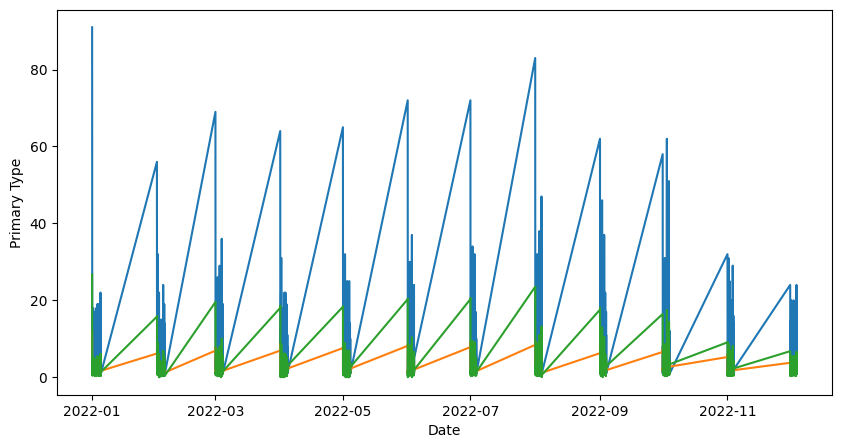

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data_1000,  x= data_1000.index , y=data_1000["Primary Type"])
sns.lineplot(data=data_1000,  x= data_1000.index , y=data_1000["RollMean"]) #turuncu ile
sns.lineplot(data=data_1000,  x= data_1000.index , y=data_1000["RollStd"]) #yesil ile

In [ ]:
#shift islemi
grouped_sh= grouped.copy()

In [ ]:
grouped_sh["shift"]= grouped_sh["Primary Type"].shift()
grouped_sh["shift_diff"]= grouped_sh["Primary Type"]-grouped_sh["shift"]
grouped_sh.head()

,Primary Type,shift,shift_diff
Date,,,
2022-01-01 00:00:00,91,NaN,NaN
2022-01-01 00:01:00,35,91.0,-56.0
2022-01-01 00:03:00,1,35.0,-34.0
2022-01-01 00:04:00,1,1.0,0.0
2022-01-01 00:05:00,3,1.0,2.0


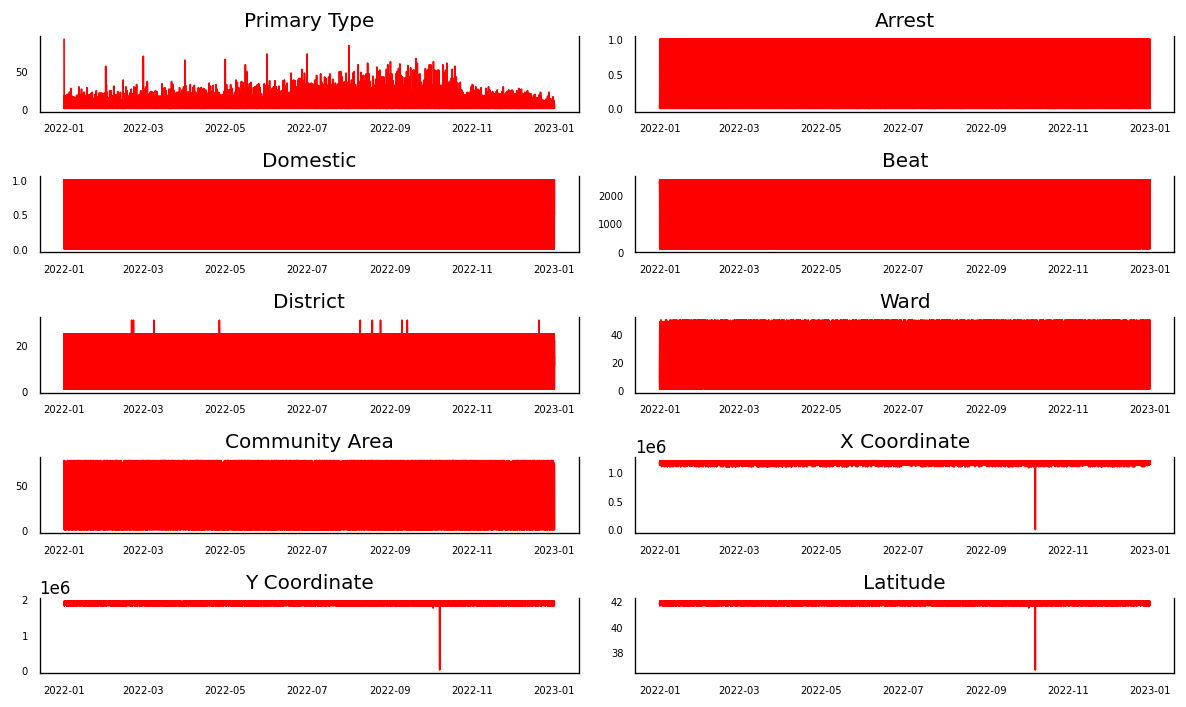

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = grouped[grouped.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(grouped.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
grouped["Primary Type"]

Date
2022-01-01 00:00:00    91
2022-01-01 00:01:00    35
2022-01-01 00:03:00     1
2022-01-01 00:04:00     1
2022-01-01 00:05:00     3
                       ..
2022-12-31 23:42:00     1
2022-12-31 23:44:00     1
2022-12-31 23:45:00     4
2022-12-31 23:47:00     2
2022-12-31 23:50:00     2
Name: Primary Type, Length: 110612, dtype: int64

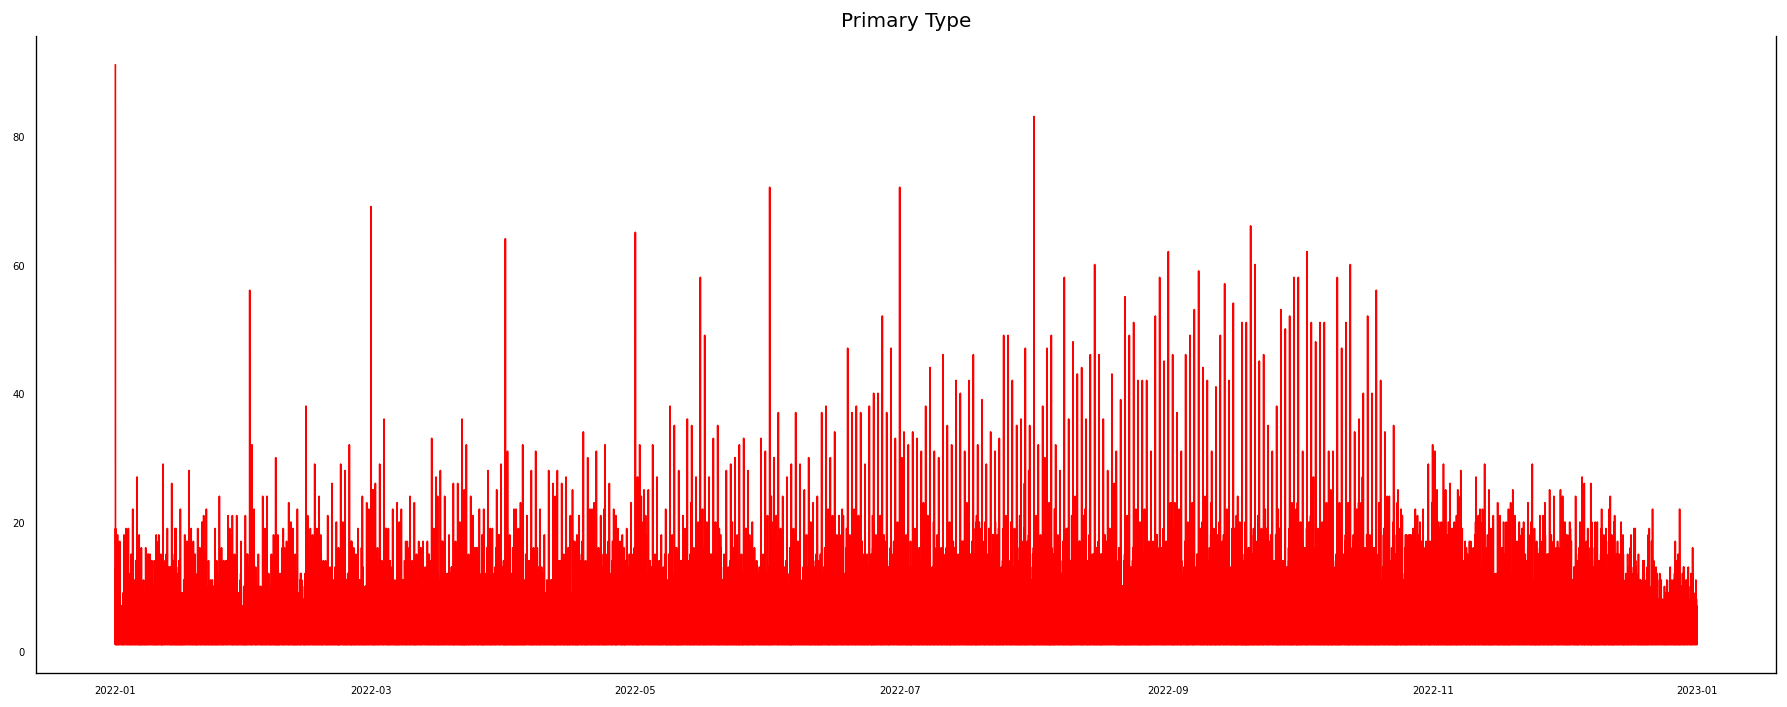

In [ ]:
##BUNU KOY

import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=120, figsize=(15, 6))

data_50 = grouped['Primary Type'].groupby(pd.Grouper(freq='M')).head(110612)
ax.plot(data_50, color='red', linewidth=1)

# Decorations
ax.set_title('Primary Type')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.spines["top"].set_alpha(0)
ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()

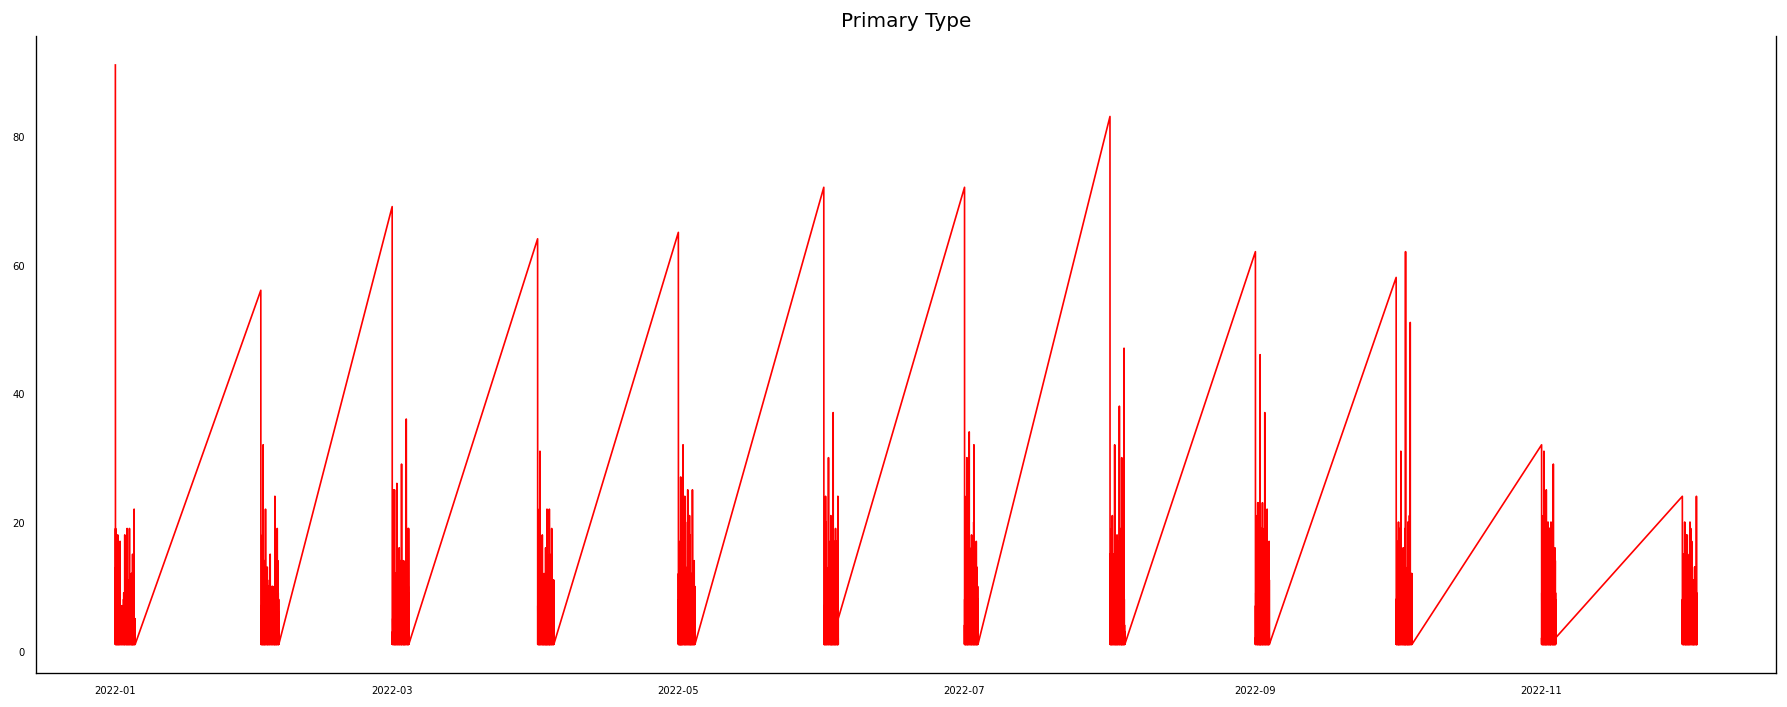

In [ ]:
##BUNU KOY

import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=120, figsize=(15, 6))

data_1000 = grouped['Primary Type'].groupby(pd.Grouper(freq='M')).head(1000)
ax.plot(data_1000, color='red', linewidth=1)

# Decorations
ax.set_title('Primary Type')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.spines["top"].set_alpha(0)
ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()

In [ ]:
data_1000

Date
2022-01-01 00:00:00    91
2022-01-01 00:01:00    35
2022-01-01 00:03:00     1
2022-01-01 00:04:00     1
2022-01-01 00:05:00     3
                       ..
2022-12-04 02:10:00     2
2022-12-04 02:11:00     1
2022-12-04 02:20:00     1
2022-12-04 02:30:00     2
2022-12-04 02:35:00     1
Name: Primary Type, Length: 12000, dtype: int64

In [ ]:
grouped.head()

,Primary Type
Date,
2022-01-01 00:00:00,91
2022-01-01 00:01:00,35
2022-01-01 00:03:00,1
2022-01-01 00:04:00,1
2022-01-01 00:05:00,3


In [ ]:
3000*12  # her aydan 3000 veeri aldım

36000

## DURAĞANLIK TESTİ

In [ ]:
## Verinin Durağan olup olmadığını Bazı istatistiksel testler ile çıkarmaya çalışacağız. Durağan olması önemli.

Tüm veri üstünde test yapınca kpssye göre durağan değil adfye göre durağan diyor. bakalım hangi aldığım test setindeki görselleştirme veriyi tam olarak temsil ediyor. tek tek hepsini testten gecircem

In [ ]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    print('--------------------------------\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


adf_test(grouped['Primary Type'])
# test istatistiği kritik değerlerden daha küçük olduğu için durağan olduğunu söyleyebiliriz.
#: If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary).
# When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

Results of Dickey-Fuller Test:
--------------------------------

Test Statistic                    -75.564171
p-value                             0.000000
#Lags Used                         18.000000
Number of Observations Used    110593.000000
Critical Value (1%)                -3.430409
Critical Value (5%)                -2.861566
Critical Value (10%)               -2.566784
dtype: float64


In [ ]:
# KPSS Testi- bir başka durağanlık testi

#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

    ## burada da test  istatistiğinin değeri tüm güven aralıklarında kritik değerden büyüktür ve bu nedenle serinin durağan olmadığını söyleyebiliriz.
    #note:
    #Testlerden biri serinin durağan olduğunu, diğeri ise serinin durağan olmadığını gösterdi! Bunun nasıl mümkün olduğunu anlamaya çalışırken saatlerce bu kısımda sıkışıp kaldım. Anlaşıldığı üzere, birden fazla durağanlık türü vardır.

  #Özetle, ADF testi doğrusal veya fark durağan alternatif bir hipoteze sahipken, KPSS testi bir serideki trend-durağanlığı tanımlar.

In [ ]:
kpss_test(grouped["Primary Type"])

Results of KPSS Test:
Test Statistic            19.878922
p-value                    0.010000
Lags Used                105.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


In [ ]:
kpss_test(data_1000)   # okeyy kpssye göre hyani gerçek veride oldupu gibi non stationary çıktı. bu yüzden onun görselleştirmesini kullanabilirim. (sunumda söyle)

Results of KPSS Test:
Test Statistic            1.102052
p-value                   0.010000
Lags Used                41.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [ ]:
data_1000= data_1000[["Primary Type"]]

In [ ]:
adf_test(data_1000)

Results of Dickey-Fuller Test:
--------------------------------

Test Statistic                   -51.132328
p-value                            0.000000
#Lags Used                         5.000000
Number of Observations Used    11994.000000
Critical Value (1%)               -3.430895
Critical Value (5%)               -2.861781
Critical Value (10%)              -2.566898
dtype: float64


In [ ]:
data_50 = grouped['Primary Type'].groupby(pd.Grouper(freq='M')).head(50)
#data_1000 = grouped['Primary Type'].groupby(pd.Grouper(freq='M')).head(1000)
data_3000 = grouped['Primary Type'].groupby(pd.Grouper(freq='M')).head(3000)

In [ ]:
adf_test(data_50)


Results of Dickey-Fuller Test:
--------------------------------

Test Statistic                 -22.185130
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    599.000000
Critical Value (1%)             -3.441314
Critical Value (5%)             -2.866377
Critical Value (10%)            -2.569346
dtype: float64


In [ ]:
kpss_test(data_50)

Results of KPSS Test:
Test Statistic           0.215532
p-value                  0.100000
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [ ]:
adf_test(data_3000)

Results of Dickey-Fuller Test:
--------------------------------

Test Statistic                   -42.976073
p-value                            0.000000
#Lags Used                        18.000000
Number of Observations Used    35981.000000
Critical Value (1%)               -3.430532
Critical Value (5%)               -2.861620
Critical Value (10%)              -2.566813
dtype: float64


In [ ]:
kpss_test(data_3000)

Results of KPSS Test:
Test Statistic            6.719786
p-value                   0.010000
Lags Used                63.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [ ]:
##########################altta gözümün önünde dursun diye yaptım

In [ ]:
adf_test(grouped)

Results of Dickey-Fuller Test:
--------------------------------

Test Statistic                    -75.564171
p-value                             0.000000
#Lags Used                         18.000000
Number of Observations Used    110593.000000
Critical Value (1%)                -3.430409
Critical Value (5%)                -2.861566
Critical Value (10%)               -2.566784
dtype: float64


In [ ]:
kpss_test(grouped)

Results of KPSS Test:
Test Statistic            19.878922
p-value                    0.010000
Lags Used                105.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


## VERİYİ DURAĞAN YAPMA

In [ ]:
#Durum 4: KPSS = durağan değil ve ADF = durağan -> fark durağan, seriyi durağan yapmak için fark alma işlemini kullanın.

In [ ]:
## Durağanlık için Difference methodu uyguluyorum

In [ ]:
#grouped["Primary_Type_diff_9000"]= grouped["Primary Type"] - grouped["Primary Type"].shift(9200) #seasinality difference  denedim ama sonuç kötü çktı
#grouped["Primary_Type_diff_9000"].dropna().plot()

In [ ]:
#grouped["Primary_Type_diff"]= grouped["Primary Type"] - grouped["Primary Type"].shift()
#grouped=grouped[["Primary Type"]]
#grouped

In [ ]:
grouped_copy= grouped.copy()

In [ ]:

grouped_copy["Primary_Type_diff"]= grouped_copy["Primary Type"] - grouped_copy["Primary Type"].shift() #seasinality difference  denedim ama sonuç kötü çktı
#grouped["Primary_Type_diff"].dropna().plot()


In [ ]:
grouped_copy

,Primary Type,Primary_Type_diff
Date,,
2022-01-01 00:00:00,91,NaN
2022-01-01 00:01:00,35,-56.0
2022-01-01 00:03:00,1,-34.0
2022-01-01 00:04:00,1,0.0
2022-01-01 00:05:00,3,2.0
...,...,...
2022-12-31 23:42:00,1,0.0
2022-12-31 23:44:00,1,0.0
2022-12-31 23:45:00,4,3.0


In [ ]:
19000/30

633.3333333333334

In [ ]:
grouped_copy["Primary_Type_diff_30"]= grouped_copy["Primary Type"] - grouped_copy["Primary Type"].shift(30)
grouped_copy["Primary_Type_diff_100"]= grouped_copy["Primary Type"] - grouped_copy["Primary Type"].shift(100)
grouped_copy["Primary_Type_diff_630"]= grouped_copy["Primary Type"] - grouped_copy["Primary Type"].shift(630)


In [ ]:
grouped_copy

,Primary Type,Primary_Type_diff,Primary_Type_diff_30,Primary_Type_diff_630,Primary_Type_diff_100
Date,,,,,
2022-01-01 00:00:00,91,NaN,NaN,NaN,NaN
2022-01-01 00:01:00,35,-56.0,NaN,NaN,NaN
2022-01-01 00:03:00,1,-34.0,NaN,NaN,NaN
2022-01-01 00:04:00,1,0.0,NaN,NaN,NaN
2022-01-01 00:05:00,3,2.0,NaN,NaN,NaN
...,...,...,...,...,...
2022-12-31 23:42:00,1,0.0,0.0,0.0,-5.0
2022-12-31 23:44:00,1,0.0,0.0,0.0,0.0
2022-12-31 23:45:00,4,3.0,2.0,-2.0,3.0


In [ ]:
# KPSS TESTINE bir daha sokuyorum veriyi.

kpss_test(grouped_copy["Primary_Type_diff"].dropna())   #KPSS testine göre veri durağan hale geldi artık

Results of KPSS Test:
Test Statistic              0.312981
p-value                     0.100000
Lags Used                4161.000000
Critical Value (10%)        0.347000
Critical Value (5%)         0.463000
Critical Value (2.5%)       0.574000
Critical Value (1%)         0.739000
dtype: float64


In [ ]:
adf_test(grouped_copy["Primary_Type_diff"].dropna())

Results of Dickey-Fuller Test:
--------------------------------

Test Statistic                    -68.624302
p-value                             0.000000
#Lags Used                         70.000000
Number of Observations Used    110540.000000
Critical Value (1%)                -3.430409
Critical Value (5%)                -2.861566
Critical Value (10%)               -2.566784
dtype: float64


In [ ]:
kpss_test(grouped_copy["Primary_Type_diff_30"].dropna()) # bu iyi çıktı

Results of KPSS Test:
Test Statistic            0.015214
p-value                   0.100000
Lags Used                97.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [ ]:
adf_test(grouped_copy["Primary_Type_diff_30"].dropna())

Results of Dickey-Fuller Test:
--------------------------------

Test Statistic                    -66.639192
p-value                             0.000000
#Lags Used                         69.000000
Number of Observations Used    110512.000000
Critical Value (1%)                -3.430409
Critical Value (5%)                -2.861566
Critical Value (10%)               -2.566784
dtype: float64


In [ ]:
kpss_test(grouped_copy["Primary_Type_diff_100"].dropna()) # bu iyi çıktı

Results of KPSS Test:
Test Statistic             0.008152
p-value                    0.100000
Lags Used                139.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


In [ ]:
kpss_test(grouped_copy["Primary_Type_diff_630"].dropna()) # bu iyi çıktı

Results of KPSS Test:
Test Statistic             0.032496
p-value                    0.100000
Lags Used                155.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


In [ ]:
adf_test(grouped_copy["Primary_Type_diff_100"].dropna()) # bu iyi çıktı

Results of Dickey-Fuller Test:
--------------------------------

Test Statistic                    -56.214668
p-value                             0.000000
#Lags Used                         39.000000
Number of Observations Used    110472.000000
Critical Value (1%)                -3.430409
Critical Value (5%)                -2.861566
Critical Value (10%)               -2.566784
dtype: float64


In [ ]:
adf_test(grouped_copy["Primary_Type_diff_630"].dropna()) # bu iyi çıktı

Results of Dickey-Fuller Test:
--------------------------------

Test Statistic                    -45.927002
p-value                             0.000000
#Lags Used                         69.000000
Number of Observations Used    109912.000000
Critical Value (1%)                -3.430409
Critical Value (5%)                -2.861566
Critical Value (10%)               -2.566784
dtype: float64


In [ ]:
# günlük ortalama kaç tane suç kaydım var ona göre mevsimsellik için sayı belirleyeceğim
import pandas as pd


df = pd.read_csv( "/content/drive/MyDrive/crime_data/Crimes_2022.csv")

# Tarih sütununu datetime formatına dönüştürme (varsayılan olarak "Tarih" olarak varsayıyoruz)
df["Date"] = pd.to_datetime(df["Date"])

# Veri setinin başlangıç ve bitiş tarihlerini alma
baslangic_tarihi = df["Date"].min()
bitis_tarihi = df["Date"].max()

# Her bir ay için veri sayısını hesaplama
aylik_veri_sayilari = []
for ay in pd.date_range(baslangic_tarihi, bitis_tarihi, freq="M"):
    ay_verileri = df.loc[(df["Date"].dt.month == ay.month) & (df["Date"].dt.year == ay.year)]
    aylik_veri_sayilari.append(len(ay_verileri))

# Sonuçlar
for i, ay in enumerate(pd.date_range(baslangic_tarihi, bitis_tarihi, freq="M")):
    print(f"{ay.strftime('%Y-%m')}: {aylik_veri_sayilari[i]} veri")



2022-01: 15581 veri
2022-02: 15223 veri
2022-03: 18362 veri
2022-04: 17989 veri
2022-05: 20122 veri
2022-06: 20758 veri
2022-07: 22246 veri
2022-08: 22269 veri
2022-09: 22289 veri
2022-10: 23149 veri
2022-11: 20739 veri
2022-12: 19828 veri


## videodaki test için fonksiyon

In [ ]:
pt=grouped[["Primary Type"]].copy(deep= True)
pt["first_diff"]=grouped[["Primary Type"]].diff()
pt["diff_30"]=grouped[["Primary Type"]].diff(30)

In [ ]:
pt

,Primary Type,first_diff,diff_30
Date,,,
2022-01-01 00:00:00,91,NaN,NaN
2022-01-01 00:01:00,35,-56.0,NaN
2022-01-01 00:03:00,1,-34.0,NaN
2022-01-01 00:04:00,1,0.0,NaN
2022-01-01 00:05:00,3,2.0,NaN
...,...,...,...
2022-12-31 23:42:00,1,0.0,0.0
2022-12-31 23:44:00,1,0.0,0.0
2022-12-31 23:45:00,4,3.0,2.0


## ARIMA VE PACF ACF plot

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf


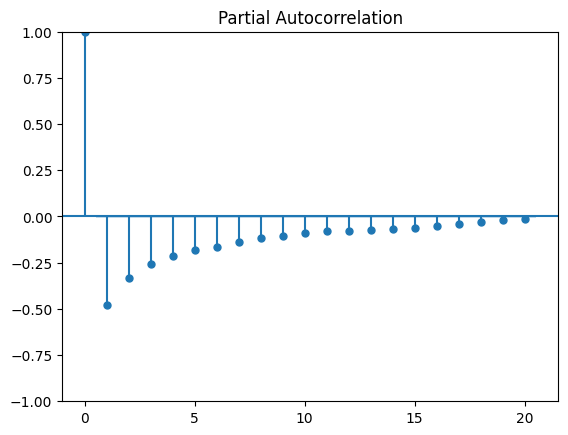

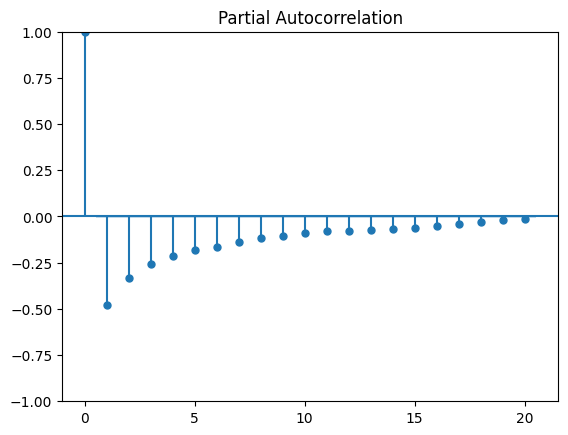

In [ ]:
plot_pacf(pt["first_diff"].dropna(), lags=20, use_vlines=True)

In [ ]:
#p=1 q=1 d= #1

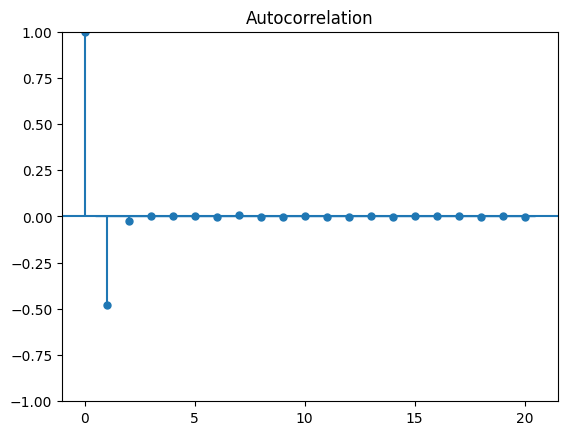

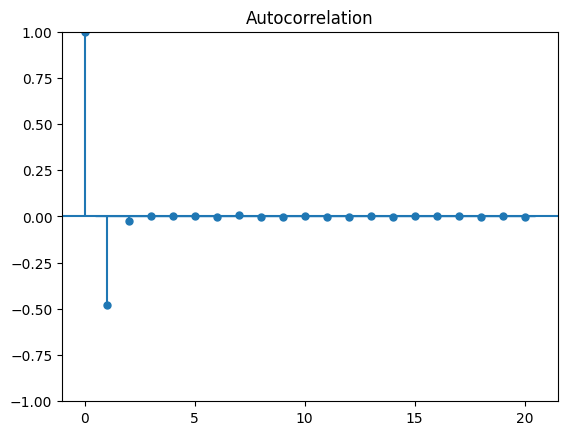

In [ ]:

plot_acf(pt["first_diff"].dropna(), lags=20, use_vlines=True)

In [ ]:
train=grouped[: round(len(grouped["Primary Type"])*80/100)]
test=grouped[round(len(grouped["Primary Type"])*80/100):]

In [ ]:
train.tail()

,Primary Type,Primary_Type_diff_3000,Primary_Type_diff_30,Primary_Type_diff_9000,Primary_Type_diff
Date,,,,,
2022-10-20 00:13:00,1,0.0,-9.0,0.0,0.0
2022-10-20 00:14:00,1,0.0,0.0,0.0,0.0
2022-10-20 00:17:00,1,0.0,0.0,0.0,0.0
2022-10-20 00:20:00,1,0.0,0.0,-18.0,0.0
2022-10-20 00:22:00,2,1.0,1.0,1.0,1.0


In [ ]:
test.head()

,Primary Type,Primary_Type_diff_3000,Primary_Type_diff_30,Primary_Type_diff_9000,Primary_Type_diff
Date,,,,,
2022-10-20 00:26:00,1,-1.0,-6.0,0.0,-1.0
2022-10-20 00:27:00,1,0.0,0.0,0.0,0.0
2022-10-20 00:30:00,2,1.0,1.0,1.0,1.0
2022-10-20 00:32:00,1,-1.0,0.0,0.0,-1.0
2022-10-20 00:35:00,1,0.0,-1.0,-2.0,0.0


In [ ]:
train=train[["Primary Type"]]

In [ ]:
#model= sm.tsa.arima.model.ARIMA(train["Primary Type"], order=(1,1,1))
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


# ARIMA modeli
model = ARIMA(train, order=(1, 1, 1))

# Eğitim
model_fit = model.fit()




In [ ]:
test.index[0]

Timestamp('2022-10-20 00:26:00')

In [ ]:
test.index[-1]

Timestamp('2022-12-31 23:50:00')

In [ ]:
test= test[["Primary Type"]]

In [ ]:
test

,Primary Type
Date,
2022-10-20 00:26:00,1
2022-10-20 00:27:00,1
2022-10-20 00:30:00,2
2022-10-20 00:32:00,1
2022-10-20 00:35:00,1
...,...
2022-12-31 23:42:00,1
2022-12-31 23:44:00,1
2022-12-31 23:45:00,4


In [ ]:
test["Primary Type"] = test["Primary Type"].astype(int)
test= test.astype(int)

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Primary Type   No. Observations:                88490
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -228227.931
Date:                Thu, 22 Jun 2023   AIC                         456461.863
Time:                        01:59:13   BIC                         456490.035
Sample:                             0   HQIC                        456470.460
                              - 88490                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0259      0.002    -12.235      0.000      -0.030      -0.022
ma.L1         -0.9998   8.99e-05  -1.11e+04      0.000      -1.000      -1.000
sigma2        10.1792      0.009   1093.701      0.000      10.161      10.197
===================================================================================
Ljung-Box (L1) (Q):                   1.39   Jarque-Bera (JB):          23332142.89
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                             6.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        81.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
def splitTrainTest(series, testSplit):
    totalData = len(series)
    trainSplit = int(totalData * (1 - testSplit))
    trainSet = series[:trainSplit]
    testSet = series[trainSplit:]
    return trainSet, testSet

In [ ]:
differencedTrainSet = difference(trainSet, 365)
model = ARIMA(differencedTrainSet, order=(7,0,1))
"""Fit model with non constant trend and no displacement"""
model_fit = model.fit(disp = 0)
forecast = model_fit.predict(len(differencedTrainSet), len(differencedTrainSet) + len(testSet))

In [ ]:
trainSet, testSet = splitTrainTest(grouped["Primary Type"].values, 0.1)
forecast = model_fit.predict(len(differencedTrainSet), len(differencedTrainSet) + len(testSet))


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA



model_fit.forecast()


#grouped["arima_pred"]=predictions


KeyError: ignored

In [ ]:
test.index[0]
test.index[-1]

Timestamp('2022-12-31 23:50:00')

In [ ]:
grouped

,Primary Type,Primary_Type_diff_3000,Primary_Type_diff_30,Primary_Type_diff_9000,Primary_Type_diff,arima_pred
Date,,,,,,
2022-01-01 00:00:00,91,NaN,NaN,NaN,NaN,NaN
2022-01-01 00:01:00,35,-56.0,NaN,NaN,-56.0,90.999025
2022-01-01 00:03:00,1,-34.0,NaN,NaN,-34.0,63.724501
2022-01-01 00:04:00,1,0.0,NaN,NaN,0.0,NaN
2022-01-01 00:05:00,3,2.0,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...
2022-12-31 23:42:00,1,0.0,0.0,0.0,0.0,NaN
2022-12-31 23:44:00,1,0.0,0.0,0.0,0.0,NaN
2022-12-31 23:45:00,4,3.0,2.0,3.0,3.0,NaN


In [ ]:
test["Primary Type"]

Date
2022-10-20 00:26:00    1
2022-10-20 00:27:00    1
2022-10-20 00:30:00    2
2022-10-20 00:32:00    1
2022-10-20 00:35:00    1
                      ..
2022-12-31 23:42:00    1
2022-12-31 23:44:00    1
2022-12-31 23:45:00    4
2022-12-31 23:47:00    2
2022-12-31 23:50:00    2
Name: Primary Type, Length: 22122, dtype: int64

In [ ]:
test

,Primary Type,Primary_Type_diff_3000,Primary_Type_diff_30,Primary_Type_diff_9000,Primary_Type_diff
Date,,,,,
2022-10-20 00:26:00,1,-1.0,-6.0,0.0,-1.0
2022-10-20 00:27:00,1,0.0,0.0,0.0,0.0
2022-10-20 00:30:00,2,1.0,1.0,1.0,1.0
2022-10-20 00:32:00,1,-1.0,0.0,0.0,-1.0
2022-10-20 00:35:00,1,0.0,-1.0,-2.0,0.0
...,...,...,...,...,...
2022-12-31 23:42:00,1,0.0,0.0,0.0,0.0
2022-12-31 23:44:00,1,0.0,0.0,0.0,0.0
2022-12-31 23:45:00,4,3.0,2.0,3.0,3.0


In [ ]:
!pip install --upgrade statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 37.8 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5


In [ ]:
# Old code
import statsmodels.api as sm

model = sm.tsa.arima_model.ARIMA(data, order=(1, 0, 1))
results = model.fit()

# Updated code
import statsmodels.api as sm

model = sm.tsa.arima.model.ARIMA(data, order=(1, 0, 1))
results = model.fit()


In [ ]:
import statsmodels.api as sm


In [ ]:
pt=data_vis[["Primary Type"]].copy(deep= True)
pt["first_diff"]=data_vis[["Primary Type"]].diff()
pt["diff_30"]=data_vis[["Primary Type"]].diff(30)

In [ ]:
pt

,Primary Type,first_diff,diff_30
Date,,,
2022-01-01 00:00:00,91,NaN,NaN
2022-01-01 00:01:00,35,-56.0,NaN
2022-01-01 00:03:00,1,-34.0,NaN
2022-01-01 00:04:00,1,0.0,NaN
2022-01-01 00:05:00,3,2.0,NaN
...,...,...,...
2022-12-10 10:27:00,1,0.0,-4.0
2022-12-10 10:30:00,4,3.0,3.0
2022-12-10 10:40:00,1,-3.0,0.0


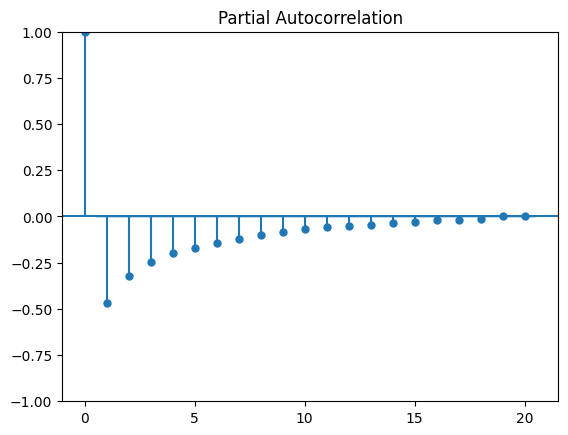

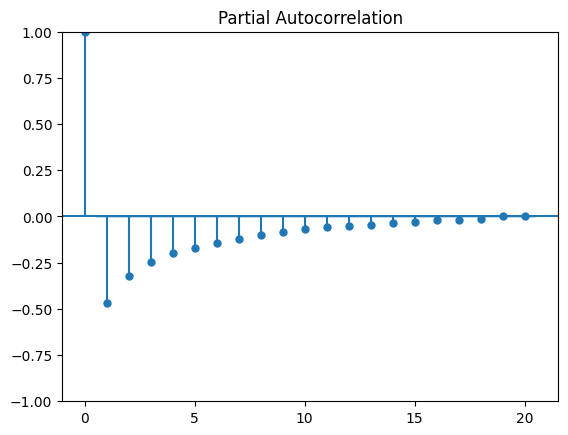

In [ ]:
plot_pacf(pt["first_diff"].dropna(), lags=20, use_vlines=True) #1'i alıcam

In [ ]:
ARIMA()

#ACF FALAN

#ARIMA

<Axes: xlabel='Date'>

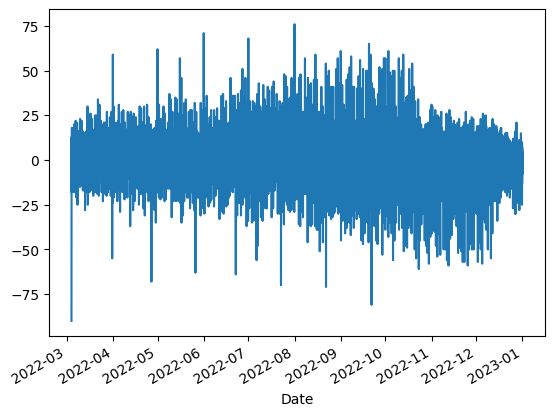

In [ ]:
grouped["Primary_Type_diff_30"]= grouped["Primary Type"] - grouped["Primary Type"].shift(16666)
grouped["Primary_Type_diff_30"].dropna().plot()

In [ ]:
data_diff = grouped['Primary_Type_diff'].groupby(pd.Grouper(freq='M')).head(50)


In [ ]:
grouped["Primary_Type_diff_30"]= data - data.shift(30)
grouped["Primary_Type_diff_30"].dropna().plot()

NameError: ignored

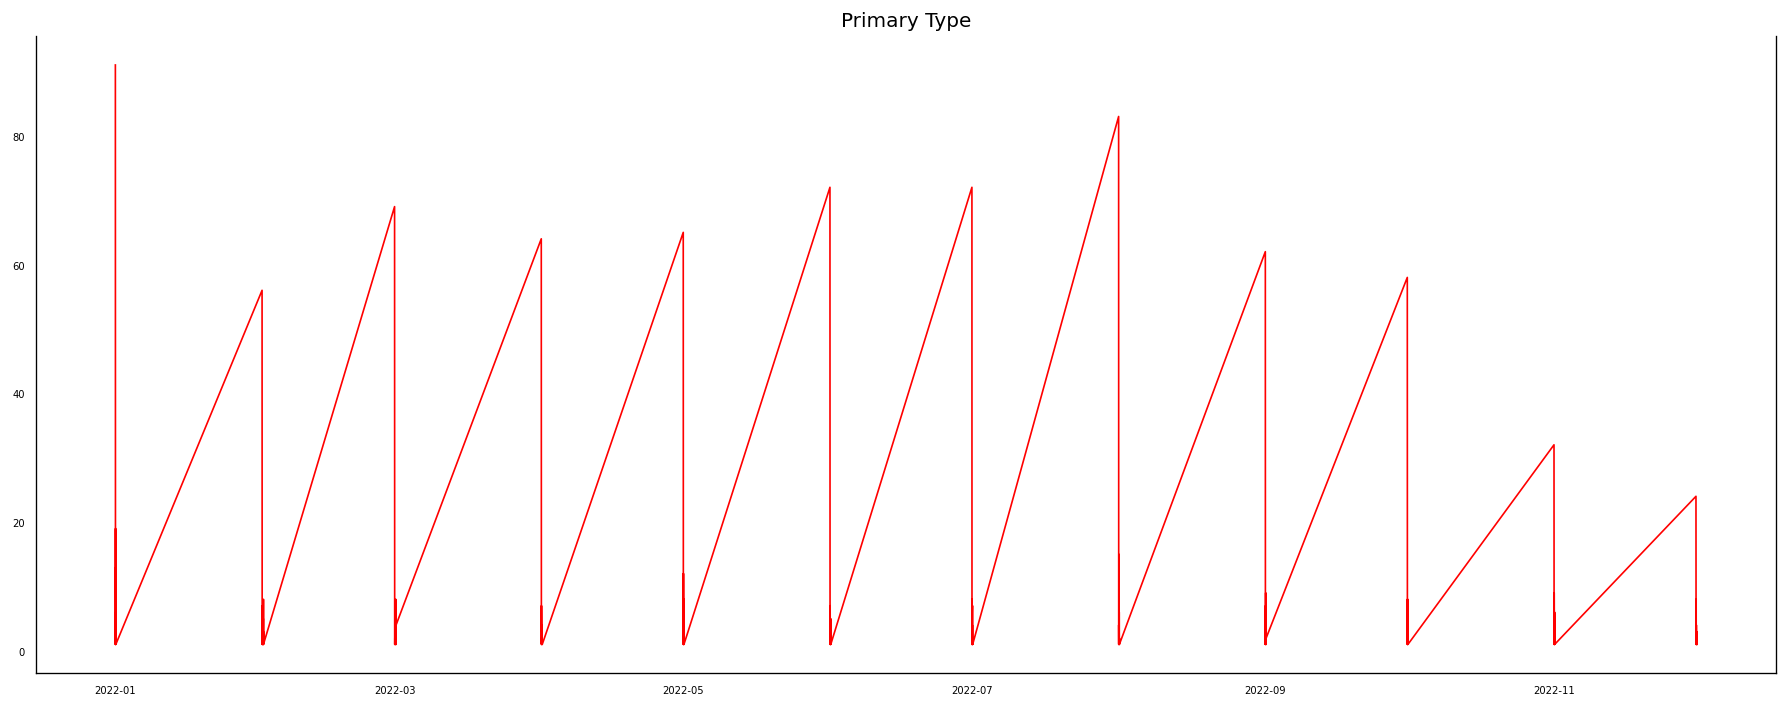

In [ ]:
##BUNU KOY

import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=120, figsize=(15, 6))

data = grouped['Primary Type'].groupby(pd.Grouper(freq='M')).head(50)
ax.plot(data, color='red', linewidth=1)

# Decorations
ax.set_title('Primary Type')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.spines["top"].set_alpha(0)
ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Mevsimsel bileşen veya trend varsa kaldırın

# İlk farkı alın
data= data.diff().dropna()  # Her gözlem değerini bir önceki gözlem değerinden çıkarır

# ADF testini uygulayın
result = adfuller(data)

# Test sonuçlarını yazdırın
print("ADF İstatistik Değeri:", result[0])
print("p-değer:", result[1])
print("Kritik değerler:")
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

# Durağanlık sağlandıysa, durağan hale getirilmiş veriyi kullanabilirsiniz
if result[1] < 0.05:
    print("Veri durağan hale getirildi.")
    # df_diff üzerinde analiz yapabilirsiniz
else:
    print("Veri durağan hale getirilemedi.")
    # Farklı bir dönüşüm yöntemi deneyebilirsiniz


ADF İstatistik Değeri: -10.237539406236126
p-değer: 4.844728797314056e-18
Kritik değerler:
	1%: -3.442
	5%: -2.867
	10%: -2.569
Veri durağan hale getirildi.


<Axes: xlabel='Date'>

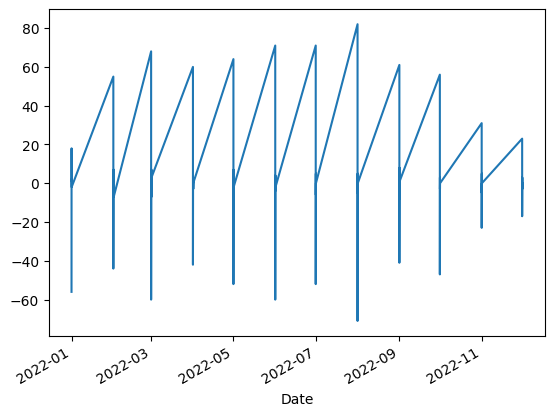

In [ ]:
data.plot() # diff uygulanınca

In [ ]:
data['#data_log'] = np.log(data)
data['#Passengers_log_diff'] =data['#data_log'] -data['#data_log'].shift(10)
data['#Passengers_log_diff'].dropna().plot()

TypeError: ignored

In [ ]:
train['#Passengers_log'] = np.log(train['#Passengers'])
train['#Passengers_log_diff'] = train['#Passengers_log'] - train['#Passengers_log'].shift(1)
train['#Passengers_log_diff'].dropna().plot()

In [ ]:
# kpss test again
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)



In [ ]:
kpss_test(grouped["Primary_Type_diff"])

Results of KPSS Test:


ValueError: ignored

In [ ]:
grouped["Primary_Type_diff"]=grouped["Primary_Type_diff"].dropna()

In [ ]:
grouped["Primary_Type_diff"]=grouped["Primary_Type_diff"].astype(int)


IntCastingNaNError: ignored

# p, d , q belirleme

In [ ]:
train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(1)
train['#Passengers_diff'].dropna().plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(grouped['Primary Type'])
result.plot()

ValueError: ignored

In [ ]:
grouped['Primary Type']

Date
2022-01-01 00:00:00    91
2022-01-01 00:01:00    35
2022-01-01 00:03:00     1
2022-01-01 00:04:00     1
2022-01-01 00:05:00     3
                       ..
2022-12-31 23:42:00     1
2022-12-31 23:44:00     1
2022-12-31 23:45:00     4
2022-12-31 23:47:00     2
2022-12-31 23:50:00     2
Name: Primary Type, Length: 110612, dtype: int64

In [ ]:
grouped = grouped[grouped['Primary Type']!='NON-CRIMINAL']

In [ ]:
df=grouped.copy() #normalize olmamış veri

In [ ]:
# min max normalization

def min_max_normalizasyon(deger):
    min_deger = grouped[deger].min()
    max_deger = grouped[deger].max()
    return (grouped[deger] - min_deger) / (max_deger - min_deger)

columns= [ 'Beat', 'District', 'Ward',
       'Community Area', 'X Coordinate', 'Y Coordinate', 'Latitude',
       'Longitude']

for kolon in columns:
  grouped[kolon] = min_max_normalizasyon(kolon)

## ML FORECAST DENIYORUM

In [ ]:
grouped.head()

,Primary Type,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude
Date,,,,,,,,,,,
2022-01-01 00:00:00,91,0.032967,0.208791,0.949670,0.200000,0.102041,0.092105,0.968396,0.965280,0.965571,0.966822
2022-01-01 00:01:00,35,0.114286,0.200000,0.041667,0.700000,0.367347,0.921053,0.967559,0.961498,0.961827,0.965882
2022-01-01 00:03:00,1,0.000000,0.000000,0.371287,0.300000,0.469388,0.368421,0.953376,0.970254,0.970571,0.950930
2022-01-01 00:04:00,1,0.000000,0.000000,0.459158,0.366667,0.530612,0.355263,0.966468,0.974252,0.974474,0.964899
2022-01-01 00:05:00,3,0.000000,0.000000,0.124175,0.100000,0.142857,0.328947,0.969207,0.960383,0.960713,0.967611


In [ ]:
!pip install mlforecast


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.2 MB/s eta 0:00:00


In [ ]:
!conda install -c conda-forge mlforecast



/bin/bash: conda: command not found


In [ ]:
import lightgbm as lgb

from mlforecast import MLForecast
from sklearn.linear_model import LinearRegression

mlf = MLForecast(
    models = [LinearRegression(), lgb.LGBMRegressor()],
    lags=[1, 12],
    freq = 'M'
)
mlf.fit(df)
mlf.predict(12)

ValueError: ignored